In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)

In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import os
print(os.listdir("/content/drive/My Drive/Capstone Project/ED/CK/"))


# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['contempt', 'sadness', 'surprise', 'disgust', 'anger', 'happy', 'fear']


In [0]:
data_path = '/content/drive/My Drive/Capstone Project/ED/CK/'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-contempt

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise

Loaded the images of dataset-disgust

Loaded the images of dataset-anger

Loaded the images of dataset-happy

Loaded the images of dataset-fear



(981, 48, 48, 3)

In [0]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177
labels[366:440]=3 #75
labels[441:647]=4 #207
labels[648:731]=5 #84
labels[732:980]=6 #249

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [0]:
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)
x_test=X_test

In [0]:
print(Y.shape)

(981, 7)


In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(833, 48, 48, 3)
(148, 48, 48, 3)
(833, 7)
(148, 7)


In [0]:
predictionsClasses = np.copy(y_test)

In [0]:
#y_train = np_utils.to_categorical(labels, num_classes)
#y_test = np_utils.to_categorical(labels, num_classes)

In [0]:
input_shape=(48,48,3)

model = Sequential()
model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


In [0]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        9280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

True

In [0]:
from keras import callbacks
filename='model_train_new.csv'
filepath="/content/drive/My Drive/Capstone Project/ED/Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [0]:
hist = model.fit(X_train, y_train, batch_size=11, epochs=100, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)


Train on 833 samples, validate on 148 samples
Epoch 1/100
833/833 [==============================] - 3s 4ms/step - loss: 1.8633 - accuracy: 0.2401 - val_loss: 1.7600 - val_accuracy: 0.3176
Epoch 2/100
833/833 [==============================] - 3s 3ms/step - loss: 1.6676 - accuracy: 0.3854 - val_loss: 1.2537 - val_accuracy: 0.5878
Epoch 3/100
833/833 [==============================] - 3s 3ms/step - loss: 1.3097 - accuracy: 0.5546 - val_loss: 0.9789 - val_accuracy: 0.6351
Epoch 4/100
833/833 [==============================] - 3s 3ms/step - loss: 1.1014 - accuracy: 0.6218 - val_loss: 1.0606 - val_accuracy: 0.6149
Epoch 5/100
833/833 [==============================] - 3s 3ms/step - loss: 1.0222 - accuracy: 0.6495 - val_loss: 0.8280 - val_accuracy: 0.6892
Epoch 6/100
833/833 [==============================] - 3s 3ms/step - loss: 0.9001 - accuracy: 0.6903 - val_loss: 0.7577 - val_accuracy: 0.7162
Epoch 7/100
833/833 [==============================] - 3s 3ms/step - loss: 0.8148 - accuracy: 0

In [0]:
X_test

In [0]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Training Loss:', score[0])
print('Training accuracy:', score[1])

Training Loss: 0.01364588547792747
Training accuracy: 0.9915966391563416


Test Loss: 0.14050448047173386
Test accuracy: 0.9729729890823364
(1, 48, 48, 3)
[[9.9999988e-01 1.0767266e-10 9.2053535e-12 9.6051822e-14 1.2588517e-07
  3.8380889e-11 1.4526115e-12]]
[0]
[[1. 0. 0. 0. 0. 0. 0.]]


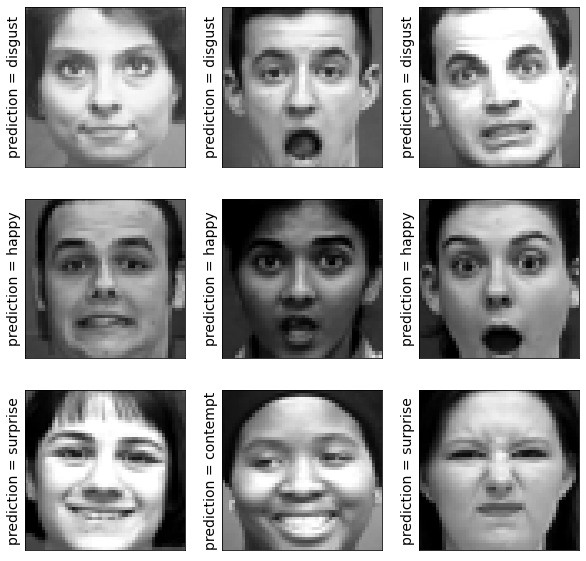

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

res = model.predict_classes(X_test[9:18])
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# show the plot
plt.show()

<Figure size 432x288 with 0 Axes>

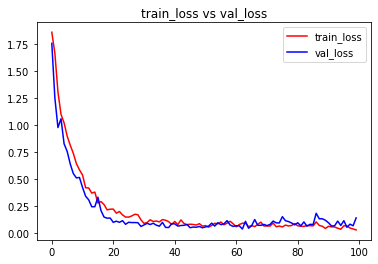

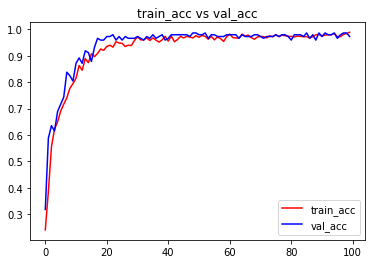

<Figure size 432x288 with 0 Axes>

In [0]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [0]:
predictionsClasses = model.predict_classes(x_test)

In [0]:
y_test.shape

(148, 7)

In [0]:
preservedY_test=y_test.argmax(1)

In [0]:
preservedY_test.shape

(148,)

In [0]:
precision = precision_score(preservedY_test, predictionsClasses, average='macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(preservedY_test, predictionsClasses, average='macro')
print('Recall: %f' % recall)


# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(preservedY_test, predictionsClasses, average='macro')
print('F1 Score>>%f' %f1)

Precision: 0.977100
Recall: 0.958072
F1 Score>>0.965314


In [0]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(preservedY_test, predictionsClasses)

array([[[127,   1],
        [  1,  19]],

       [[141,   0],
        [  0,   7]],

       [[115,   1],
        [  0,  32]],

       [[138,   0],
        [  0,  10]],

       [[123,   2],
        [  0,  23]],

       [[139,   0],
        [  2,   7]],

       [[101,   0],
        [  1,  46]]])

In [0]:
from sklearn import metrics
print(metrics.confusion_matrix(preservedY_test, predictionsClasses))

# Print the precision and recall, among other metrics
print(metrics.classification_report(preservedY_test, predictionsClasses, digits=7))

[[19  0  1  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  0 32  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  0  0 23  0  0]
 [ 0  0  0  0  2  7  0]
 [ 1  0  0  0  0  0 46]]
              precision    recall  f1-score   support

           0  0.9500000 0.9500000 0.9500000        20
           1  1.0000000 1.0000000 1.0000000         7
           2  0.9696970 1.0000000 0.9846154        32
           3  1.0000000 1.0000000 1.0000000        10
           4  0.9200000 1.0000000 0.9583333        23
           5  1.0000000 0.7777778 0.8750000         9
           6  1.0000000 0.9787234 0.9892473        47

    accuracy                      0.9729730       148
   macro avg  0.9770996 0.9580716 0.9653137       148
weighted avg  0.9742588 0.9729730 0.9724256       148



In [0]:
! pip install -q scikit-plot

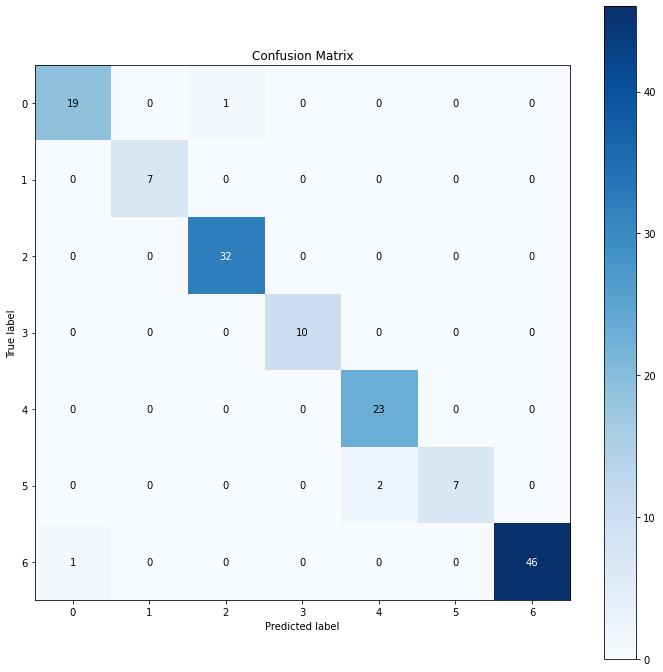

In [0]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(preservedY_test, predictionsClasses,
    figsize=(12,12))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


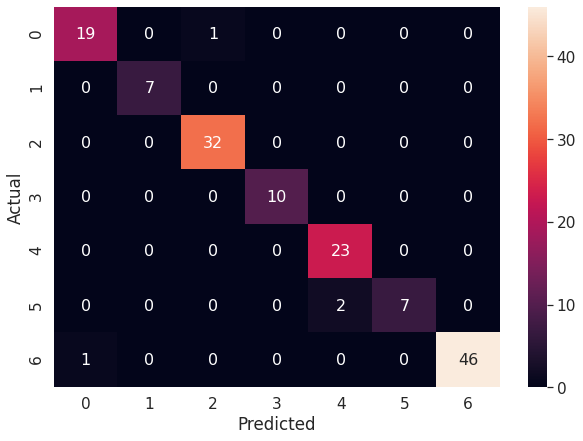

In [0]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
data = confusion_matrix(preservedY_test, predictionsClasses)
df_cm = pd.DataFrame(data, columns=np.unique(preservedY_test), index = np.unique(preservedY_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

# Testing with another set of images

In [0]:
def testModel(filePath) :
  test_input_img=cv2.imread(filePath )
  test_img_data_list=[]
  test_input_img_resize=cv2.resize(test_input_img,(48,48))
  test_img_data_list.append(test_input_img_resize)

  test_img_data_list = np.array(test_img_data_list)
  test_img_data_list = test_img_data_list.astype('float32')
  test_img_data_list = test_img_data_list/255
  test_img_data_list.shape
  amir_test_image = test_img_data_list[0:1]
  print(model.predict(amir_test_image))
  print(model.predict_classes(amir_test_image))

  test_res = model.predict_classes(amir_test_image)
  plt.figure(figsize=(10, 10))

  for i in range(0, 1):
      plt.subplot(330 + 1 + i)
      plt.imshow(amir_test_image[i],cmap=plt.get_cmap('gray'))
      plt.gca().get_xaxis().set_ticks([])
      plt.gca().get_yaxis().set_ticks([])
      plt.ylabel('prediction = %s' % getLabel(test_res[i]), fontsize=14)
  # show the plot
  plt.show()

[[2.0014322e-05 2.7615816e-04 2.5399156e-09 5.1651006e-03 3.7378812e-01
  6.2052035e-01 2.3025538e-04]]
[5]


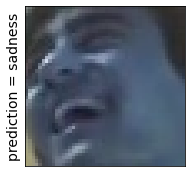

In [0]:
testModel('/content/drive/My Drive/Capstone Project/ED/AmirKhan_45.jpg')

[[8.7714359e-02 1.8046636e-07 1.1284120e-17 3.3492833e-12 2.2384551e-04
  9.1206157e-01 8.6162982e-10]]
[5]


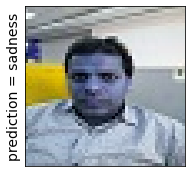

[[8.4968179e-04 6.9806108e-09 3.9126460e-17 1.6010222e-09 9.6912140e-01
  3.0028865e-02 3.4405642e-10]]
[4]


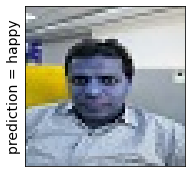

[[3.1667968e-09 2.8562532e-08 3.1055676e-25 2.4019954e-17 8.6235206e-11
  1.0000000e+00 3.4570490e-08]]
[5]


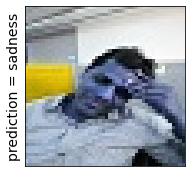

[[6.0105348e-10 9.5721438e-14 1.4177901e-33 6.6325973e-24 1.0237569e-06
  9.9999893e-01 3.0211492e-19]]
[5]


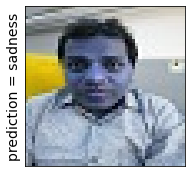

[[6.3858010e-08 1.7372426e-10 1.5483578e-28 2.1550757e-21 8.0327801e-03
  9.9196714e-01 1.5347362e-16]]
[5]


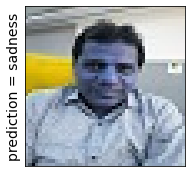

In [0]:
testModel('/content/drive/My Drive/Capstone Project/ED/Ashish2.jpg')
testModel('/content/drive/My Drive/Capstone Project/ED/Ashish3.jpg')
testModel('/content/drive/My Drive/Capstone Project/ED/Ashish4.jpg')
testModel('/content/drive/My Drive/Capstone Project/ED/Ashish5.jpg')
testModel('/content/drive/My Drive/Capstone Project/ED/Ashish6.jpg')

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  testModel(filename)
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
import pickle

In [0]:
filename = '/content/drive/My Drive/Capstone Project/Apr25/finalized_model1.sav'
pickle.dump(model, open(filename, 'wb'))